# Alphonso Data Analysis
### By Perizat Kupagulova

## Introduction

We are going to explore and analyze TV advertisement data from Alphonso.

The source data was downloaded from Alphonso Insights page:


http://insights.alphonso.tv/

There are many brands that we can download the data for.

Let's explore the data for some car company, since the automotive industry companies are major TV advertisers.

We downloaded data for Chevrolet during 2016:

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_excel('chevrolet-2016.xlsx')

Let's see the available columns in the report:

In [4]:
for key in df.keys():
    print(key)

Id
Title
Brand
Category
Network
Show
Date
Time
Pod Position
Dayparts
Tags
Co-Op Brand
Product
Duration
EQ Units
Broadcast Year
Broadcast Quarter
Broadcast Month
Broadcast Week


Some sample data:

In [8]:
df.head()

,Id,Title,Brand,Category,Network,Show,Date,Time,Pod Position,Dayparts,Tags,Co-Op Brand,Product,Duration,EQ Units,Broadcast Year,Broadcast Quarter,Broadcast Month,Broadcast Week
0,3224071,"Chevrolet 2017 Traverse ""Find New Roads"" - Red...",Chevrolet,Auto & Parts,TNT,The Lord of the Rings: The Return of the King,2016-12-31,11:57:28 PM,1,LATE FRINGE,Cable,NaN,Chevrolet 2017 Traverse,30,1.0,2017,Q1,Jan,1
1,3224071,"Chevrolet 2017 Traverse ""Find New Roads"" - Red...",Chevrolet,Auto & Parts,NBC,NBC's New Year's Eve With Carson Daly,2016-12-31,11:54:43 PM,4,LATE FRINGE,Late Night,NaN,Chevrolet 2017 Traverse,30,1.0,2017,Q1,Jan,1
2,3224071,"Chevrolet 2017 Traverse ""Find New Roads"" - Red...",Chevrolet,Auto & Parts,Animal Planet,Pit Bulls & Parolees: Pack of Pits,2016-12-31,11:53:33 PM,1,LATE FRINGE,Cable,NaN,Chevrolet 2017 Traverse,30,1.0,2017,Q1,Jan,1
3,3223110,"Chevrolet 2017 Silverado 1500 ""Find New Roads""...",Chevrolet,Auto & Parts,Telemundo,Bienvenido 2017,2016-12-31,11:43:08 PM,2,LATE FRINGE,Hispanic,NaN,Chevrolet 2017 Silverado 1500,30,1.0,2017,Q1,Jan,1
4,3222963,"Chevrolet 2017 Equinox ""Find New Roads"" TV Com...",Chevrolet,Auto & Parts,UNIMAS,Noticiero UnivisiÃƒÆ’Ã†â€™Ãƒâ€šÃ‚Â³n: Fin de S...,2016-12-31,11:40:30 PM,8,LATE FRINGE,Hispanic,NaN,Chevrolet 2017 Equinox,30,1.0,2017,Q1,Jan,1


Every row in the file is some airing of a TV ad.

Let's look at the distribution of airings by network.

(Showing top 20 networks for better visualization)

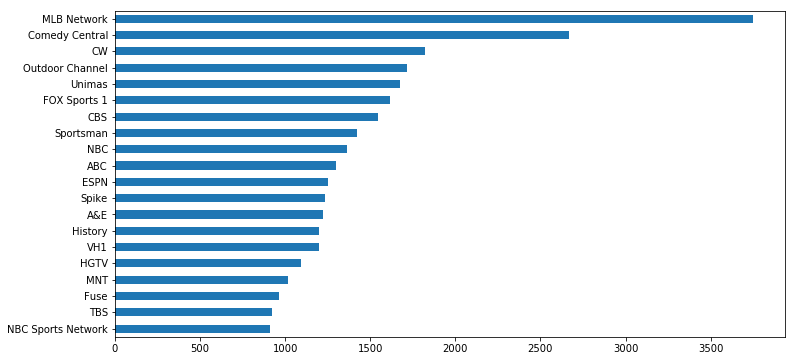

In [39]:
df['Network'].value_counts().head(20).plot.barh()

plt.rcParams['figure.figsize'] = (12,6)
plt.gca().invert_yaxis()
plt.show()

We compared our graph with the one on Alphonso site.

It turns out that "Unimas" brand is 5th in our chart while it's 3rd here:

<img src="img/chevrolet-networks.png" style="height:400px">

This difference was caused by the fact that the Unimas brand appears in two versions in the report file: "Unimas" and "UNIMAS". After converting all network names to uppercase, we can see the figure matches the chart from the site:

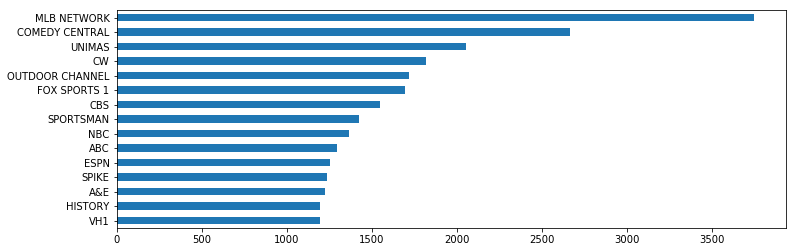

In [49]:

df['Network Uppercase'] = df['Network'].str.upper()
df['Network Uppercase'].value_counts().head(15).plot.barh()

plt.rcParams['figure.figsize'] = (12,4)
plt.gca().invert_yaxis()
plt.show()

We can see that Chevrolet's top targeted audiences were from very different segments: baseball fans, comedy watchers and Spanish TV watchers.

Let's look at the distribution of airings by show:

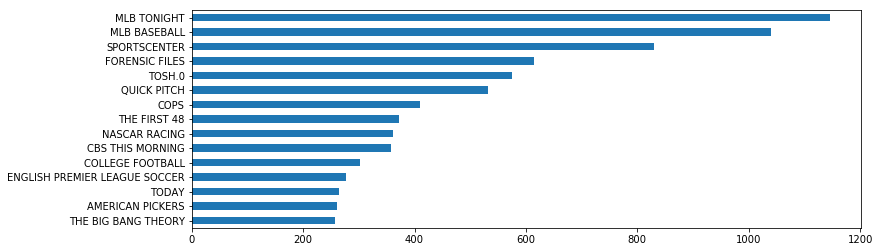

In [55]:
df['Show'].str.upper().value_counts().head(15).plot.barh()

plt.rcParams['figure.figsize'] = (12,4)
plt.gca().invert_yaxis()
plt.show()

Reasonably, the top shows are related to baseball, comedy and Spanish channels.

Let's take a look at the airings distribution by quarter:

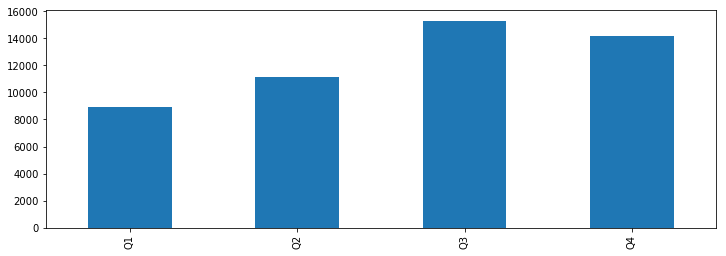

In [56]:
df['Broadcast Quarter'].value_counts().sort_index().plot.bar()
plt.show()

We see that airings topped at Q3. We can see the amount of airings for more granular periods.

Airings by months:

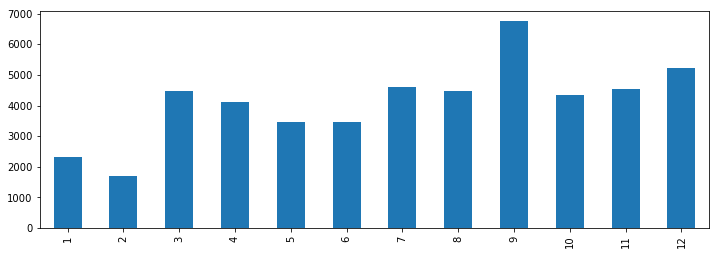

In [58]:
df['Month Number'] = [d.month for d in df['Date']]
df['Month Number'].value_counts().sort_index().plot.bar()
plt.rcParams['figure.figsize'] = (12,6)
plt.show()

Interestingly, September is a leader of airings. Possibly, the reason can be MLB 2016 World Series, which finished on October 2.

Airings by week:

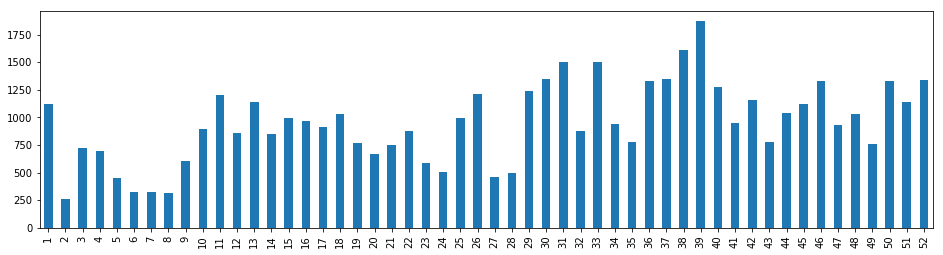

In [64]:
df['Broadcast Week'].value_counts().sort_index().plot.bar()
plt.rcParams['figure.figsize'] = (16,4)
plt.show()

We can see that 39th week is a peak for airings, which is Sep 26 - Oct 2. This data strengthens our assumption about MLB final games. 

Let's load some more data and see how can we compare the brands.

We downloaded 2016 reports for two more brands: Dodge and Ford.

In [68]:
files = ['chevrolet-2016.xlsx', 'dodge-2016.xlsx', 'ford-2016.xlsx']
labels = ['Chevrolet', 'Dodge', 'Ford']
data = [pd.read_excel(file) for file in files]

Let's look at the monthly number of airings for three brands:

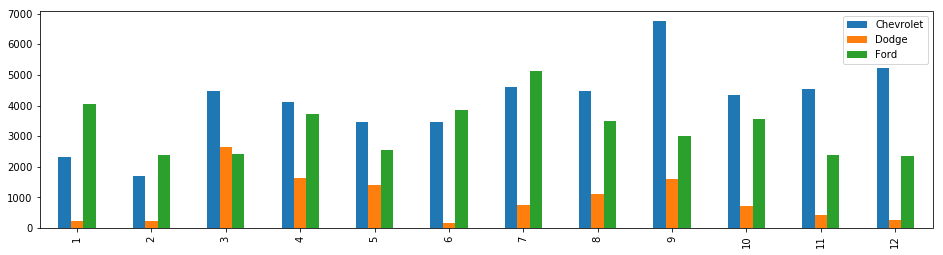

In [69]:
df_month = pd.DataFrame(columns=labels)
for idx, df in enumerate(data):
    df_month[labels[idx]] = pd.Series([d.month for d in df['Date']]).value_counts().sort_index()

df_month.plot.bar()
plt.show()

There seems no any apparent relation between the airings of the brands. However, we could analyze the correlation between the airings of different brands.

Now, we downloaded the 2016 reports for all 34 brands in the automotive industry in Alphonso.

It can be done automatically with a python script, we won't go into details.

In [ ]:
import urllib.request
import urllib.parse

domain = 'http://insights.alphonso.tv/email_request'
query = 'param1={brand_name}&brand_id1={brand_id}&paramN=a&paramCO=e' + \
        '&startDate={start_date}&endDate={end_date}&email={email}'

for index, row in df.iterrows():
    if index < 23:
        continue
    url = domain + '?' + query.format(
        brand_name=row['brand'].replace(' ', '%20'),
        brand_id=row['id'],
        start_date='2016-01-01',
        end_date='2016-12-31',
        email='<your-email-here>'
    )
    result = urllib.request.urlopen(url).read()

In [70]:
import seaborn as sns
sns.set(context="paper", font="monospace")


Let's read all the reports into a single dataframe.
We have the list of report filenames in `auto-reports.csv` file.

In [71]:
files = pd.read_csv('auto-reports.csv')
df = None
for idx, row in files.iterrows():
    file = 'reports/' + row['filename']
    print('reading {}'.format(file))
    df = pd.read_excel(file) if df is None else df.append(pd.read_excel(file), ignore_index=True)

reading reports/alphonso-1499078426.xlsx
reading reports/alphonso-1499077592.xlsx
reading reports/alphonso-1499078452.xlsx
reading reports/alphonso-1499077650.xlsx
reading reports/alphonso-1499078400.xlsx
reading reports/alphonso-1499077619.xlsx
reading reports/alphonso-1499078431.xlsx
reading reports/alphonso-1499077614.xlsx
reading reports/alphonso-1499077603.xlsx
reading reports/alphonso-1499078405.xlsx
reading reports/alphonso-1499077572.xlsx
reading reports/alphonso-1499077582.xlsx
reading reports/alphonso-1499077624.xlsx
reading reports/alphonso-1499077577.xlsx
reading reports/alphonso-1499077608.xlsx
reading reports/alphonso-1499077662.xlsx
reading reports/alphonso-1499077688.xlsx
reading reports/alphonso-1499078441.xlsx
reading reports/alphonso-1499078410.xlsx
reading reports/alphonso-1499077656.xlsx
reading reports/alphonso-1499077667.xlsx
reading reports/alphonso-1499077683.xlsx
reading reports/alphonso-1499077645.xlsx
reading reports/alphonso-1499078421.xlsx
reading reports/

Let's see how many airings we have for each brand:

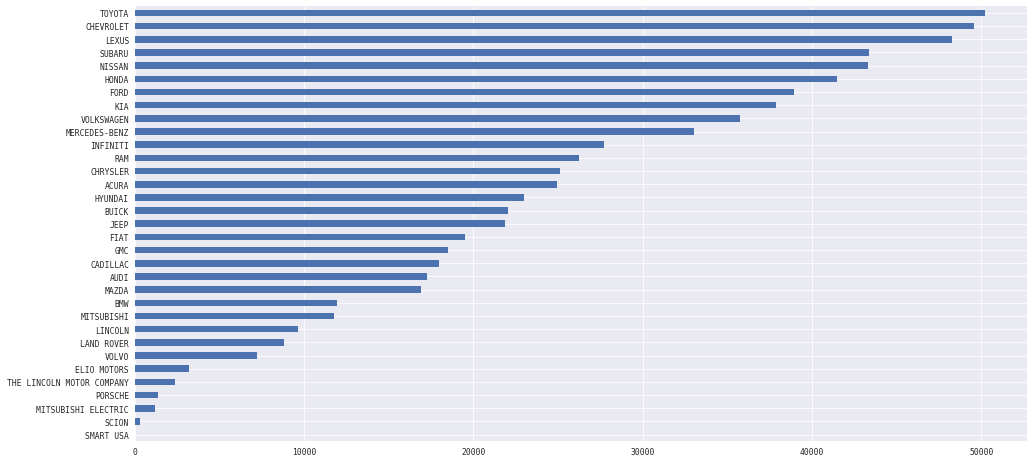

In [83]:
df['Brand'].str.upper().value_counts().plot.barh()

plt.rcParams['figure.figsize'] = (16,8)
plt.gca().invert_yaxis()
plt.show()

Let's create a `Month/Year` column to make sure we didn't include any data from years other than 2016.

In [85]:
df['Month/Year'] = [date.strftime('%m/%Y') for date in df['Date']]
df['Month/Year'].value_counts()

10/2016    73846
09/2016    70297
04/2016    69118
06/2016    69018
11/2016    68354
07/2016    67548
08/2016    66313
12/2016    63506
05/2016    55397
01/2016    53065
03/2016    44098
02/2016    40278
Name: Month/Year, dtype: int64

As we can see, October, September and April were top months for TV advertising in car industry.

We build a new dataframe that will store the number of airings for each brand aggregated by months.

In [101]:
monthly_airings = pd.DataFrame()
monthly_airings['Total'] = df.groupby('Month/Year').size()

for brand in df['Brand'].unique():
    brand_airings = df.loc[df['Brand'] == brand]
    monthly_airings[brand] = brand_airings.groupby('Month/Year').size()

# see sample data
monthly_airings[['Total', 'Toyota', 'Chevrolet', 'Lexus']]

,Total,Toyota,Chevrolet,Lexus
Month/Year,,,,
01/2016,53065,5651,2325,4451
02/2016,40278,4304,1689,4723
03/2016,44098,3751,4492,2527
04/2016,69118,6020,4123,4254
05/2016,55397,3914,3462,2270
06/2016,69018,6324,3466,5431
07/2016,67548,4528,4621,2989
08/2016,66313,4252,4479,4056
09/2016,70297,4753,6765,4047


Now, let's build the correlation matrix for the brands:

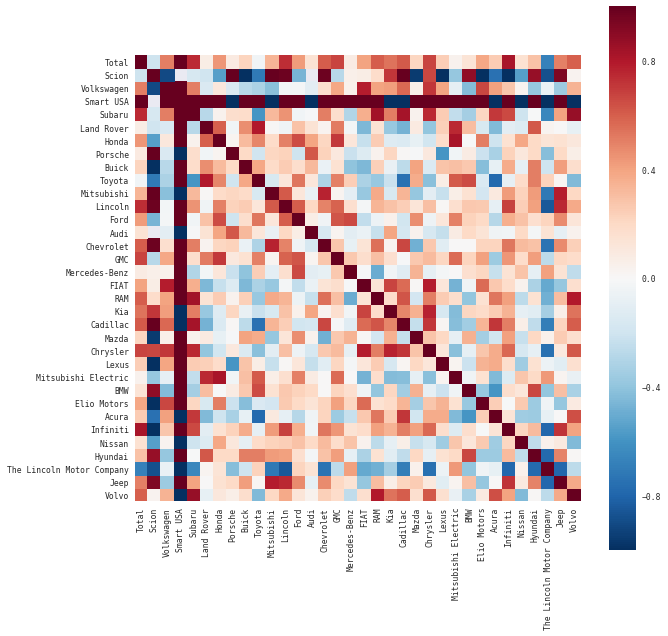

In [96]:
sns.heatmap(monthly_airings.corr(), vmax=.8, square=True)
plt.rcParams['figure.figsize'] = (10,10)
plt.show()

As we saw from the correlation matrix, brands like Smart USA and Scion show high positive or negative correlation with all brands. This is resulted by insufficient data for these brands:

In [97]:
monthly_airings[['Smart USA', 'Scion']]

,Smart USA,Scion
Month/Year,,
01/2016,NaN,8.0
02/2016,NaN,1.0
03/2016,NaN,290.0
04/2016,NaN,NaN
05/2016,14.0,NaN
06/2016,25.0,NaN
07/2016,NaN,NaN
08/2016,NaN,NaN
09/2016,NaN,NaN


So, we can treat them as outliers and exclude from the correlation matrix. 

In [102]:
del monthly_airings['Smart USA']
del monthly_airings['Scion']

Also, let's sort the brands by level of their correlation with total number of airings, for better visibility:

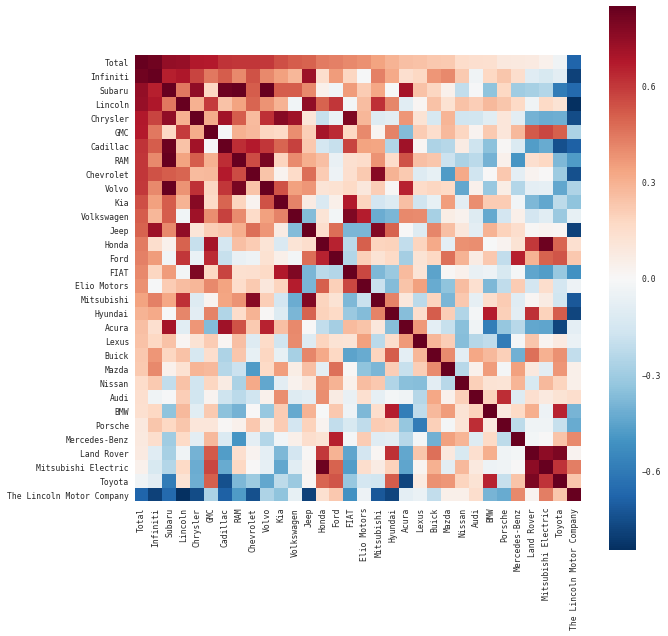

In [103]:
ix = monthly_airings.corr().sort_values('Total', ascending=False).index
monthly_airings_sorted = monthly_airings.loc[:, ix]

sns.heatmap(monthly_airings_sorted.corr(), vmax=.8, square=True)
plt.show()

As we see, upper left corner shows the most correlated brands, like Infiniti, Subaru, Lincoln, Chrysler, Cadillac. etc. These are mainly luxury car brands and it's interesting to observe similar TV advertising behavior among them.

Another interesting group of brands are Land Rover, GMC, Toyota, Honda and Mitsubishi Electric, which also highly correlate with each other. Most of these are Japanese car manufacturers.

Interestingly, brand pairs like Toyota and Lexus, Honda and Acura do not show any high positive or negative correlation.

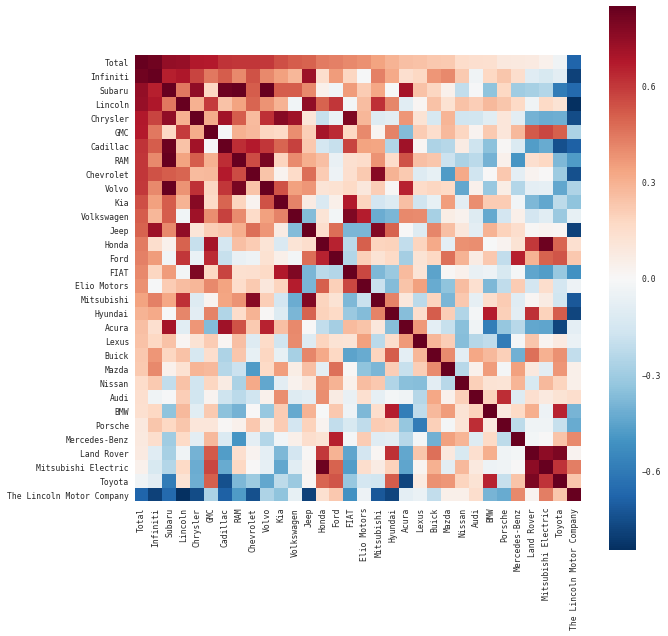

In [105]:
sns.heatmap(monthly_airings_sorted.corr(), vmax=.8, square=True)
plt.show()

# Thanks for attention!